An example of strategy based on the markowitz min variance portfolio. Your duty is to propose a particular strategy similar to the one located at the folder 'example' 

Load Data

In [ ]:
from modules.load_data import load_data
dict_data = load_data()
print(dict_data.keys())

In [ ]:
dict_data['prices']

A single day example

In [18]:
from example.strategy_minRisk import strategy_minRisk
weights = strategy_minRisk(dict_data, t = 500, size = 20)

Simulator

In [20]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from modules.strategy_simulator import strategy_simulator

#import your strategy
from example.strategy_minRisk import strategy_minRisk

# Initialize data structures to store results
ret_port = pd.Series(dtype="float64")  # Series to store portfolio returns
weights_db = pd.DataFrame()  # DataFrame to store historical weights

# Loop through a range of time values
for t in tqdm(range(500, len(dict_data['prices'].index) - 1)):
    
    # Use the strategy simulator to get portfolio's historical weights [weights_db]
    # and its next day returns [ret_port]

    ret_port, weights_db = strategy_simulator(path = "example/",
                                              strategy = strategy_minRisk,
                                              data_source = dict_data,
                                              t = t,
                                              ret_port = ret_port,
                                              weights_db = weights_db,
                                              size = 10)


100%|██████████| 2539/2539 [04:10<00:00, 10.15it/s]


Análise do Backtest

c:\Python311\Lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(
c:\Python311\Lib\site-packages\fastparquet\dataframe.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\pyfolio\plotting.py:666: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.861%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2013-05-30
End date,2023-06-29
Total months,120
,Backtest
Annual return,5.861%
Cumulative returns,77.518%
Annual volatility,14.624%
Sharpe ratio,0.46
Calmar ratio,0.17
Stability,0.88
Max drawdown,-34.015%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.02,2020-02-18,2020-03-23,NaT,NaN
1,10.84,2018-01-26,2018-02-08,2018-09-13,165
2,10.57,2014-12-29,2015-08-25,2015-10-22,214
3,9.60,2018-11-30,2018-12-24,2019-03-12,73
4,8.25,2013-07-19,2013-10-08,2014-03-31,182


c:\Python311\Lib\site-packages\pyfolio\tears.py:1004: UserWarning: Passed returns do not overlap with anyinteresting times.
  warnings.warn(


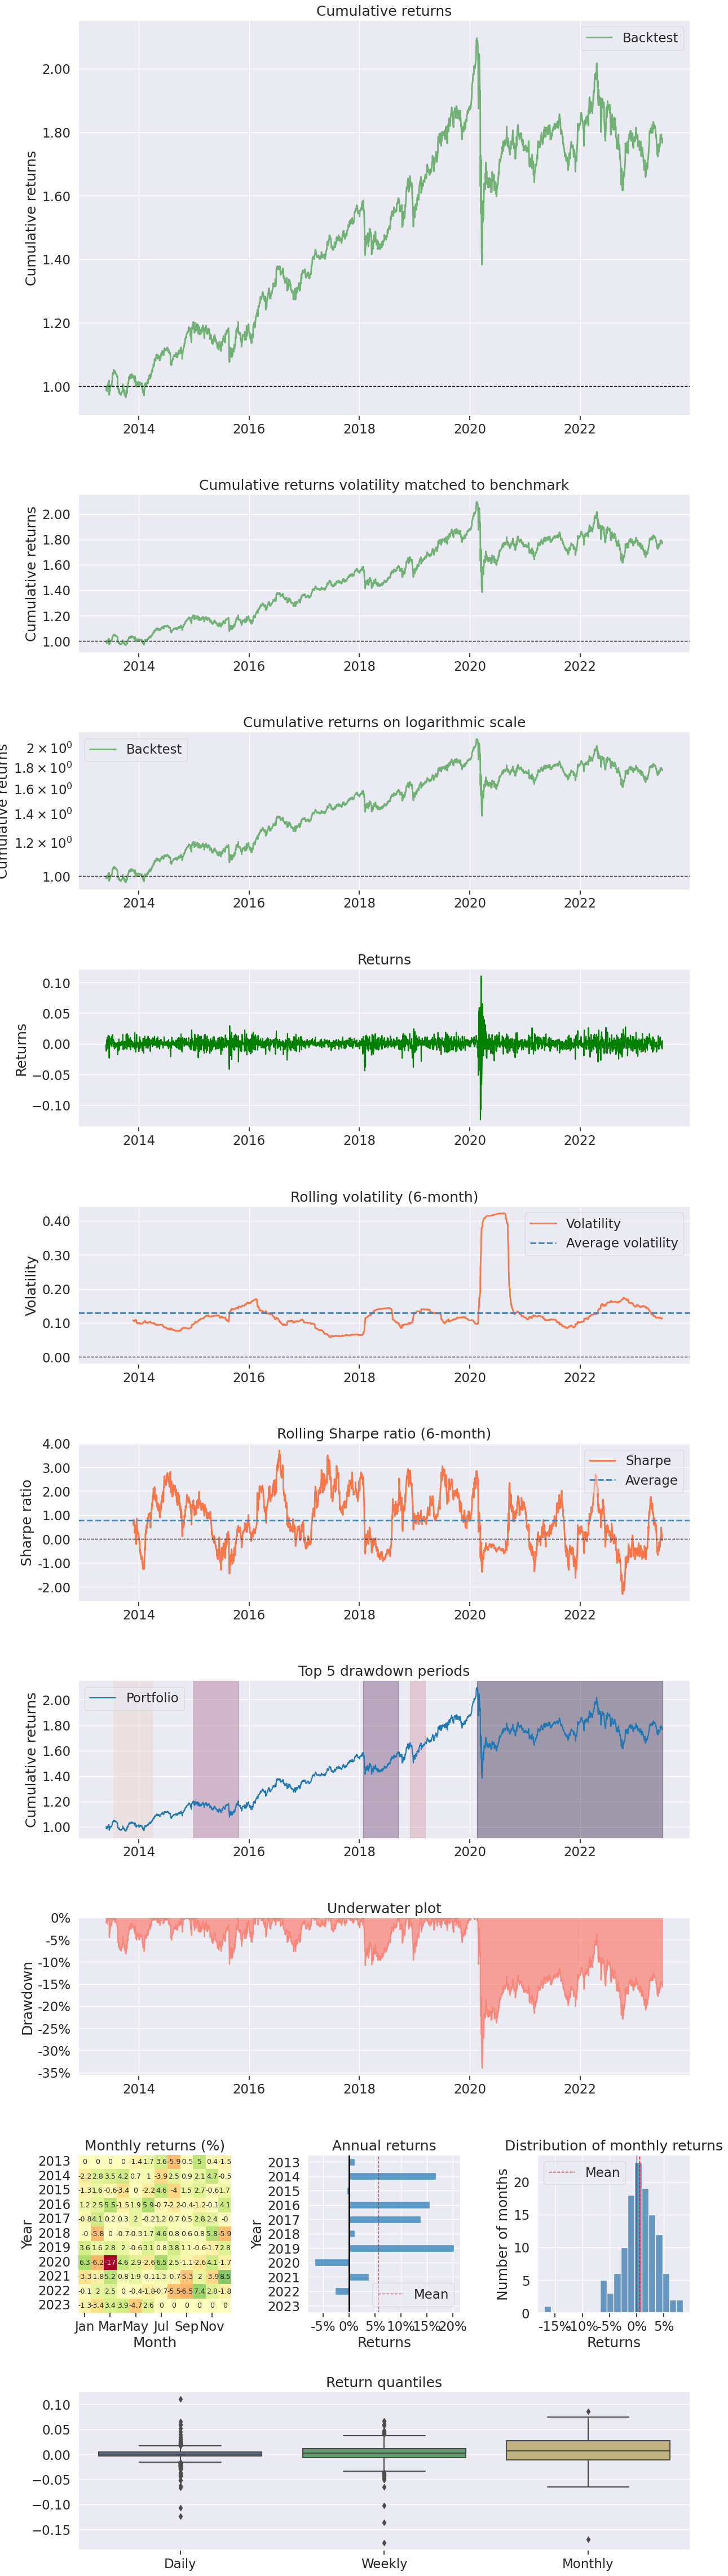

In [1]:
from modules.sharpe_ratio_stats import *
import pyfolio as pf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display

ret_port = pd.read_parquet("example/ret_port.parquet")
ret_port['date'] = pd.to_datetime(ret_port['date'], format = "%Y-%m-%d")
ret_port = ret_port.set_index("date")

tear_sheet = pf.create_full_tear_sheet(ret_port['ret_port'])

tear_sheet